 1. import and install dependency


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

  2. Keypoints using MP Holistic

In [2]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [4]:
def draw_landmarks(image,results):
    
     # Draw face landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION)
    
    # Draw pose landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS)
    
    # Draw left hand landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
    
    # Draw right hand landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)


In [5]:
def draw_styled_landmarks(image,results):
    # Draw face landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION,mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    
    # Draw pose landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    
    # Draw left hand landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    
    # Draw right hand landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))
    

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
cap=cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame=cap.read()
        
        #make detections
        image,results=mediapipe_detection(frame,holistic)
        print(results)
        
        #draw landmarksq
        draw_styled_landmarks(image,results)
        
        #show to screen
        cv2.imshow('openCV Feed',image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):#destroy/break out gracefully
            break
    cap.release()
    cv2.destroyAllWindows()    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results.pose_landmarks

landmark {
  x: 0.5929011106491089
  y: 0.5219407081604004
  z: -1.3927662372589111
  visibility: 0.9996110796928406
}
landmark {
  x: 0.6482897400856018
  y: 0.43222901225090027
  z: -1.278588056564331
  visibility: 0.999530017375946
}
landmark {
  x: 0.6760928630828857
  y: 0.4352324903011322
  z: -1.278202772140503
  visibility: 0.9993739724159241
}
landmark {
  x: 0.6992925405502319
  y: 0.4391613006591797
  z: -1.2783832550048828
  visibility: 0.9993835687637329
}
landmark {
  x: 0.5566462278366089
  y: 0.4249798357486725
  z: -1.2555243968963623
  visibility: 0.9995567798614502
}
landmark {
  x: 0.5262435674667358
  y: 0.4226808547973633
  z: -1.2543517351150513
  visibility: 0.9995343089103699
}
landmark {
  x: 0.49973922967910767
  y: 0.42179134488105774
  z: -1.2546970844268799
  visibility: 0.9996572732925415
}
landmark {
  x: 0.7483183741569519
  y: 0.5047202706336975
  z: -0.639419674873352
  visibility: 0.9993675947189331
}
landmark {
  x: 0.47146791219711304
  y: 0.480538

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame,results)

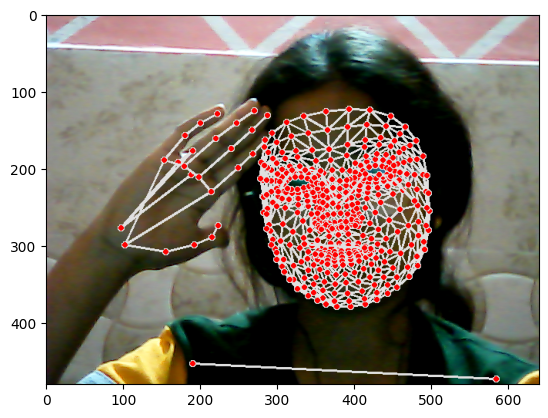

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

 3. Extract KeyPoint Values

In [12]:
len(results.pose_landmarks.landmark)

33

In [13]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [14]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [15]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [16]:
len(results.face_landmarks.landmark)*3

1404

In [17]:
def extract_keypoints(results):
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    return np.concatenate([pose,face,lh,rh])

In [18]:
result_test=extract_keypoints(results)[:-10]
result_test

array([ 0.59290111,  0.52194071, -1.39276624, ..., -0.03841326,
        0.24027866,  0.39425218])

In [19]:
#np.save('0',result_test)

 4. Setting Folder for Collection

In [20]:
DATA_PATH=os.path.join('MP_Data')   
actions=np.array(['hello','thanks','bye'])  # Action that we Try to detect
no_sequences=30
sequence_length=30

In [21]:
# for action in actions:
#      for sequence in range(no_sequences):
#         try:
#              os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
#         except:
#              pass    

 5 Collect Keypoint  Values for Training and Testing

In [22]:
# cap=cv2.VideoCapture(0)
# #set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
#     for action in actions:
#         for sequence in range(no_sequences):
#             for frame_num in range(sequence_length):
#                 ret,frame=cap.read()
        
#                 #make detections
#                 image,results=mediapipe_detection(frame,holistic)
                
#                 #draw landmarksq
#                 draw_styled_landmarks(image,results)
                
#                 if frame_num==0:
#                     cv2.putText(image,'STARTING COLLECTION',(120,200),
#                                 cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
#                     cv2.putText(image,'collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
#                                 cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),4,cv2.LINE_AA)
#                     cv2.imshow('openCV Feed',image)
#                     cv2.waitKey(2000)
                
#                 else:
#                     cv2.putText(image,'collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
#                                 cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),4,cv2.LINE_AA)
#                     cv2.imshow('openCV Feed',image)
                    
#                 keypoints=extract_keypoints(results)
#                 npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num)) 
#                 np.save(npy_path,keypoints)   
                
                
#                 if cv2.waitKey(10) & 0xFF == ord('q'):#destroy/break out gracefully
#                     break
#     cap.release()
#     cv2.destroyAllWindows()    

 6 .Preprocess data and Create labels and features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map={label:num for num,label in enumerate(actions)}

In [25]:
label_map

{'hello': 0, 'thanks': 1, 'bye': 2}

In [26]:
sequences,labels=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])    

In [27]:
x=np.array(sequences)
x.shape

(90, 30, 1662)

In [28]:
y=to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

In [30]:
x_train.shape

(85, 30, 1662)

 7. Build and Train LSTM Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [33]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [34]:
res=[.7,0.2,0.1]
actions[np.argmax(res)]

'hello'

In [35]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [37]:
model.fit(x_train,y_train,epochs=200,callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 0s 122ms/step - loss: 4.7795 - categorical_accuracy: 0.4235
Epoch 2/200
3/3 [==============================] - 0s 117ms/step - loss: 5.2065 - categorical_accuracy: 0.3176
Epoch 3/200
3/3 [==============================] - 0s 111ms/step - loss: 4.7732 - categorical_accuracy: 0.3412
Epoch 4/200
3/3 [==============================] - 0s 142ms/step - loss: 7.2613 - categorical_accuracy: 0.3882
Epoch 5/200
3/3 [==============================] - 0s 117ms/step - loss: 6.3943 - categorical_accuracy: 0.2706
Epoch 6/200
3/3 [==============================] - 0s 121ms/step - loss: 5.2683 - categorical_accuracy: 0.3882
Epoch 7/200
3/3 [==============================] - 0s 116ms/step - loss: 8.2971 - categorical_accuracy: 0.3176
Epoch 8/200
3/3 [==============================] - 0s 115ms/step - loss: 7.1049 - categorical_accuracy: 0.2824
Epoch 9/200
3/3 [==============================] - 0s 111ms/step - loss: 5.3527 - categorical_accuracy: 0.3176
E

  8. Make predictions

In [ ]:
res=model.predict(x_test)

1/1 [==============================] - 0s 55ms/step


In [ ]:
actions[np.argmax(res[1])]

'hello'

In [ ]:
actions[np.argmax(y_test[1])]

'hello'

 9. Save weights

In [ ]:
model.save('action.h5')
#del model
#model.load_weights('action.h5')

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


  10. Evaluation using confusion matrix and accuracy

In [ ]:
from sklearn.metrics import  multilabel_confusion_matrix,accuracy_score

In [ ]:
yhat=model.predict(x_train)

3/3 [==============================] - 0s 47ms/step


In [ ]:
ytrue=np.argmax(y_train,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[57,  0],
        [ 0, 28]],

       [[57,  0],
        [ 0, 28]],

       [[56,  0],
        [ 0, 29]]], dtype=int64)

In [ ]:
accuracy_score(ytrue,yhat)

1.0

 11. Testing

In [ ]:
# from scipy import stats

In [ ]:
# colors = [(245,117,16), (117,245,16), (16,117,245)]
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
#     return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[ -30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'prob_viz' is not defined